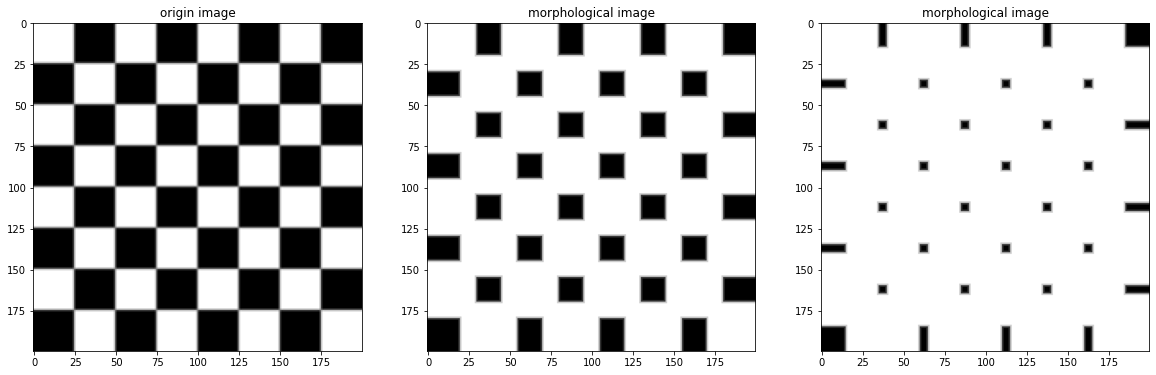

In [24]:
from skimage import data
import skimage.morphology as sm
import matplotlib.pyplot as plt

#1、膨胀（dilation)
# 原理：一般对二值图像进行操作。找到像素值为1的点，将它的邻近像素点都设置成这个值。1值表示白，0值表示黑，因此膨胀操作可以扩大白色值范围，压缩黑色值范围。一般用来扩充边缘或填充小的孔洞。

# 功能函数：skimage.morphology.dilation(image, selem=None）

# selem表示结构元素，用于设定局部区域的形状和大小。
img=data.checkerboard()
dst1=sm.dilation(img,sm.disk(5))  #用边长为5的正方形滤波器进行膨胀滤波
dst2=sm.dilation(img,sm.disk(10))  #用边长为15的正方形滤波器进行膨胀滤波
plt.figure('morphology',figsize=(20,8))
plt.subplot(131)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)

plt.subplot(132)
plt.title('morphological image')
plt.imshow(dst1,plt.cm.gray)

plt.subplot(133)
plt.title('morphological image')
plt.imshow(dst2,plt.cm.gray)

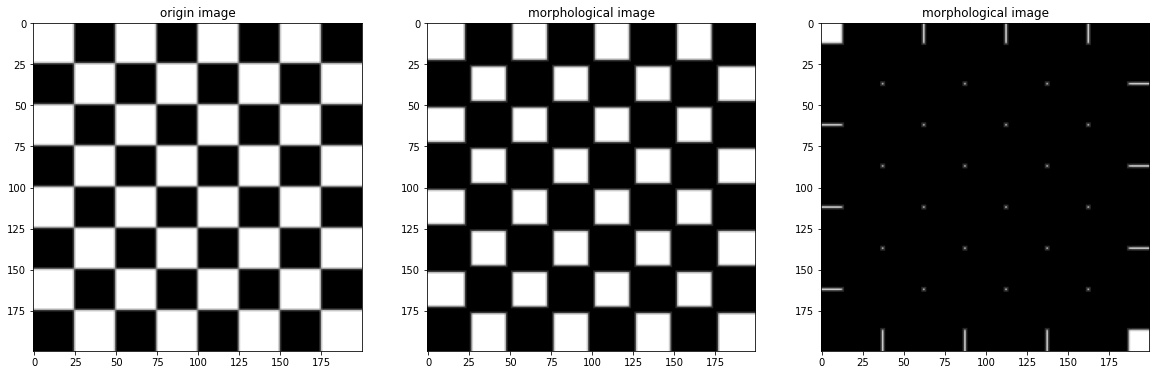

In [25]:
# 2、腐蚀（erosion)

# 函数：skimage.morphology.erosion(image, selem=None）

# selem表示结构元素，用于设定局部区域的形状和大小。

# 和膨胀相反的操作，将0值扩充到邻近像素。扩大黑色部分，减小白色部分。可用来提取骨干信息，去掉毛刺，去掉孤立的像素。
from skimage import data
import skimage.morphology as sm
import matplotlib.pyplot as plt
img=data.checkerboard()
dst1=sm.erosion(img,sm.square(5))  #用边长为5的正方形滤波器进行膨胀滤波
dst2=sm.erosion(img,sm.square(25))  #用边长为25的正方形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(20,8))
plt.subplot(131)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)

plt.subplot(132)
plt.title('morphological image')
plt.imshow(dst1,plt.cm.gray)

plt.subplot(133)
plt.title('morphological image')
plt.imshow(dst2,plt.cm.gray)

(-0.5, 511.5, 511.5, -0.5)

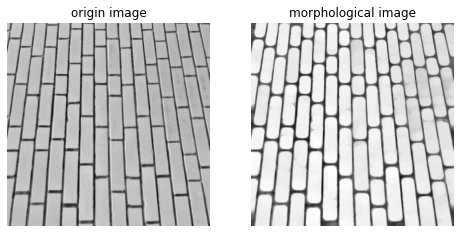

In [29]:
# 3、开运算（opening)

# 函数：skimage.morphology.openning(image, selem=None）

# selem表示结构元素，用于设定局部区域的形状和大小。

# 先腐蚀再膨胀，可以消除小物体或小斑块。
from skimage import io,color
import skimage.morphology as sm
import matplotlib.pyplot as plt
from skimage.filters import inverse
img=data.brick()
img = 1- img

dst=sm.opening(img,sm.disk(9))  #用边长为9的圆形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
plt.axis('off')

plt.subplot(122)
plt.title('morphological image')
plt.imshow(dst,plt.cm.gray)
plt.axis('off')

(-0.5, 1279.5, 1279.5, -0.5)

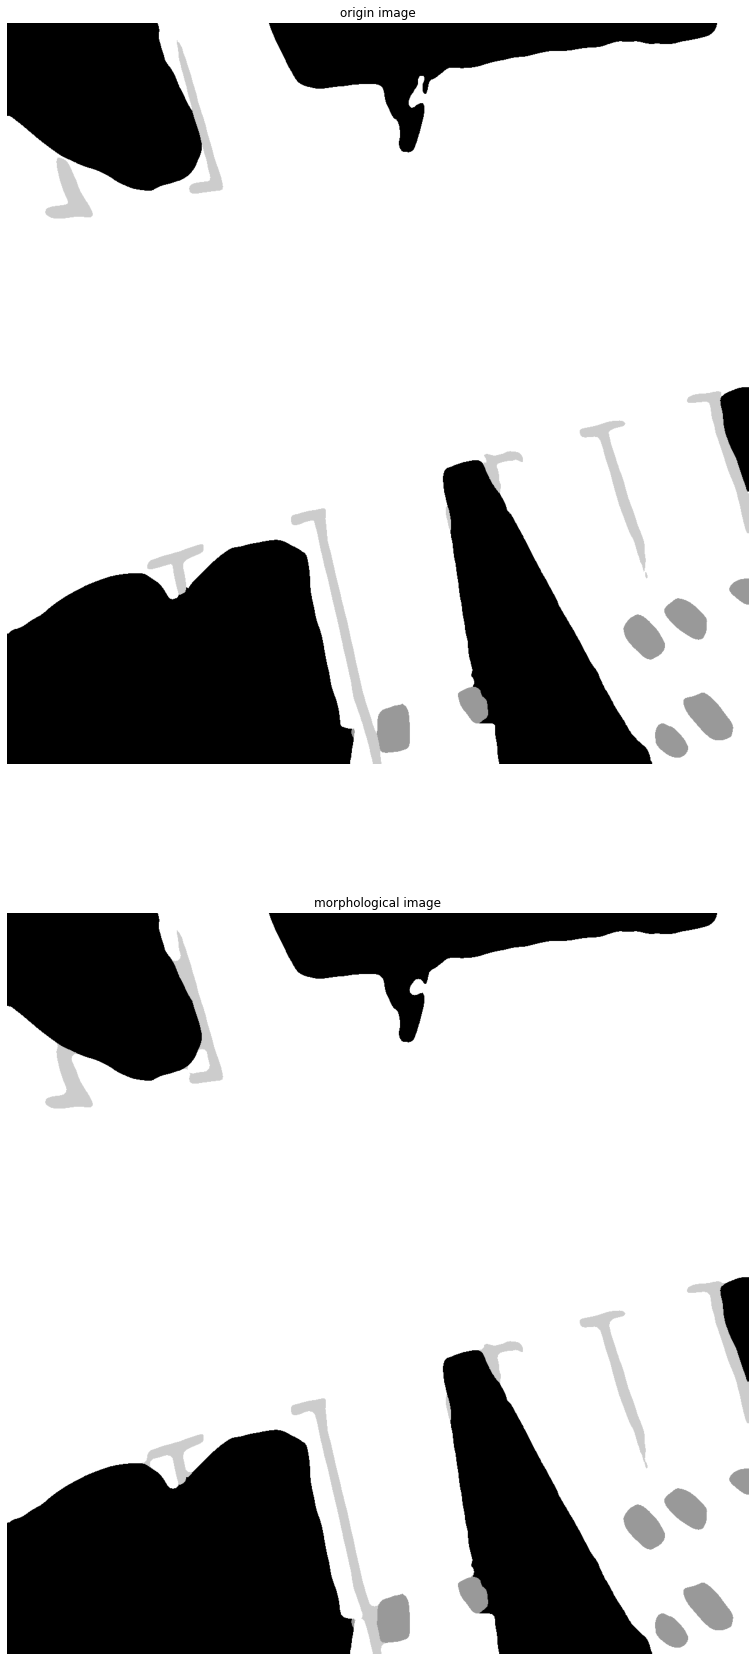

In [40]:
img=color.rgb2gray(io.imread('mask.png'))
dst=sm.opening(img,sm.disk(9))  #用边长为9的圆形滤波器进行膨胀滤波
Image.fromarray(dst).save('mask2.png')
plt.figure('morphology',figsize=(15,30))
plt.subplot(211)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
plt.axis('off')

plt.subplot(212)
plt.title('morphological image')
plt.imshow(dst,plt.cm.gray)
plt.axis('off')

In [50]:
Image.open('mask.png').palette

In [54]:
import topojson as tp
import pickle, random
from PIL import Image, ImageDraw, ImageFont

CLASSES = ('road', 'curb', 'obstacle', 'chock', 'parking_line', 'road_line', 'vehicle')
PALETTE = [(0, 0, 0), (0, 255, 255), (0, 255, 0), (255, 0, 0), (0, 0, 255), (0, 128, 255), (128, 128, 128)]


data = pickle.load(open('topo_data', 'rb'))
topo = tp.Topology(data)
topo_s = topo.toposimplify(epsilon=1, simplify_algorithm='dp')
topo_json = topo_s.output
# topo.to_widget()
topo_s.to_alt(color='properties.name:N')

alt.Chart(...)

In [102]:
#test erosion and dilation
import cv2
import skimage.morphology as sm
from skimage import measure

img = np.zeros((9,9))
img[1:7,2:8] = 1
img[3:5,4:6] = 0
print(img)
print(sm.dilation(img, sm.square(3)))
print(sm.erosion(img, sm.square(3)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [101]:
#test polygon with hole
img = np.zeros((9,9))
img[1:7,2:8] = 1
img[3:5,4:6] = 0
print(img)
polygons = measure.find_contours(img)
for polygon in polygons:
    p = measure.approximate_polygon(polygon, 1)
    print(p)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[6.5 7. ]
 [6.  1.5]
 [0.5 2. ]
 [1.  7.5]
 [6.5 7. ]]
[[4.  5.5]
 [2.5 5. ]
 [3.  3.5]
 [4.5 4. ]
 [4.  5.5]]


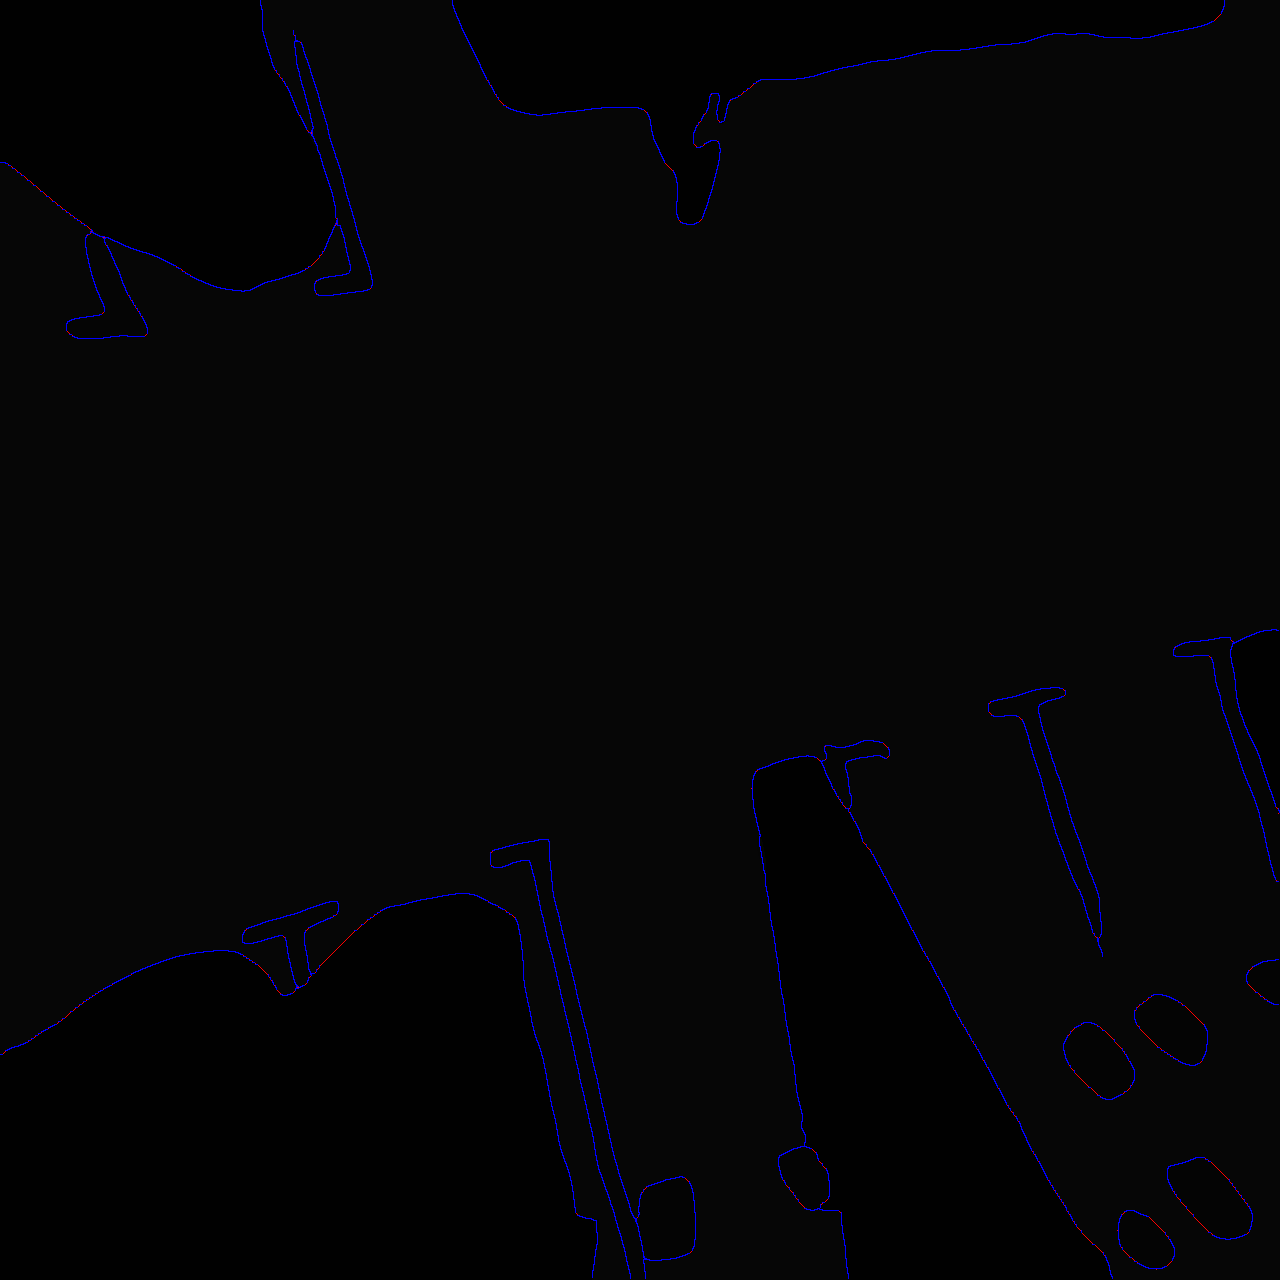

In [194]:
# edge
from skimage.feature import canny

img = Image.open('mask.png')
img2 = img.convert(mode='RGBA')
draw = ImageDraw.Draw(img2)
mask = np.asarray(img)
#opencv
# mask = cv2.copyMakeBorder(mask, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
# polygons = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE, offset=(-1, -1))
# polygons = polygons[0] if len(polygons) == 2 else polygons[1]
# polygons = [polygon.flatten() for polygon in polygons]
# edge = cv2.Canny(mask, 0.5, 1)

#skimage
edge = canny(mask,1,0.5,1)
edge = sm.closing(edge, sm.disk(3))
edge = skeletonize(edge)
polygons = measure.find_contours(edge)
for polygon in polygons:
    polygon = measure.approximate_polygon(polygon, 1)
    p2 = [(i[1], i[0]) for i in polygon]
    draw.polygon(p2, fill='red', outline='blue')
img2.save('edge.png')
img2

In [272]:
#test cv2 findcontours
img = Image.open('mask.png')
result = np.asarray(img)
# result.convertTo()
polygons = cv2.findContours(np.where(result==1,1,0).astype(np.uint8), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
np.array(polygons[0]).squeeze().shape

(436, 2)

In [273]:
[0,1].index(0)

0

In [249]:
# test direction
from math import tan, atan
x1, y1 = 100, 100
x, y = 105, 120
x2, y2 = 110, 140
ratio = (y2-y1)/(x2-x1)
tan(ratio)
atan(ratio)

1.1578212823495775